In [1]:
import numpy as np
from scipy.ndimage import filters
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
def plane_sweep_ncc(im_l,im_r,start,steps,wid):
	""" 使用归一化的互相关计算视差图像 """
	m,n = im_l.shape
	# 保存不同求和值的数组
	mean_l = np.zeros((m,n))
	mean_r = np.zeros((m,n))
	s = np.zeros((m,n))
	s_l = np.zeros((m,n))
	s_r = np.zeros((m,n))
	# 保存深度平面的数组
	dmaps = np.zeros((m,n,steps))
	# 计算图像块的平均值
	filters.uniform_filter(im_l,wid,mean_l)
	filters.uniform_filter(im_r,wid,mean_r)
	# 归一化图像
	norm_l = im_l - mean_l
	norm_r = im_r - mean_r
	# 尝试不同的视差
	for displ in range(steps):
	# 将左边图像移动到右边，计算加和
		filters.uniform_filter(np.roll(norm_l,-displ-start)*norm_r,wid,s) # 和归一化
		filters.uniform_filter(np.roll(norm_l,-displ-start)*np.roll(norm_l,-displ-start),wid,s_l)
		filters.uniform_filter(norm_r*norm_r,wid,s_r) # 和反归一化
		# 保存 ncc 的分数
		dmaps[:,:,displ] = s/np.sqrt(s_l*s_r)
	# 为每个像素选取最佳深度
	return np.argmax(dmaps,axis=2)

def plane_sweep_gauss(im_l,im_r,start,steps,wid):
	""" 使用带有高斯加权周边的归一化互相关计算视差图像 """
	m,n = im_l.shape
	# 保存不同加和的数组
	mean_l = np.zeros((m,n))
	mean_r = np.zeros((m,n))
	s = np.zeros((m,n))
	s_l = np.zeros((m,n))
	s_r = np.zeros((m,n))
	# 保存深度平面的数组
	dmaps = np.zeros((m,n,steps))
	# 计算平均值
	filters.gaussian_filter(im_l,wid,0,mean_l)
	filters.gaussian_filter(im_r,wid,0,mean_r)
	# 归一化图像
	norm_l = im_l - mean_l
	norm_r = im_r - mean_r
	# 尝试不同的视差
	for displ in range(steps):
		# 将左边图像移动到右边，计算加和
		filters.gaussian_filter(np.roll(norm_l,-displ-start)*norm_r,wid,0,s) # 和归一化
		filters.gaussian_filter(np.roll(norm_l,-displ-start)*np.roll(norm_l,-displ-start),wid,0,s_l)
		filters.gaussian_filter(norm_r*norm_r,wid,0,s_r) # 和反归一化
		# 保存 ncc 的分数
		dmaps[:,:,displ] = s/np.sqrt(s_l*s_r)
	# 为每个像素选取最佳深度
	return np.argmax(dmaps,axis=2)



3


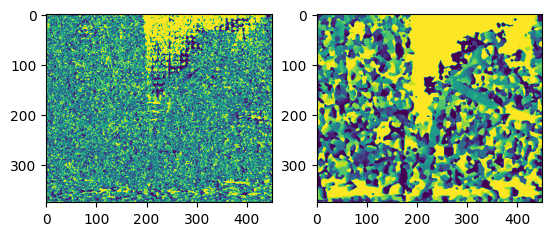

5


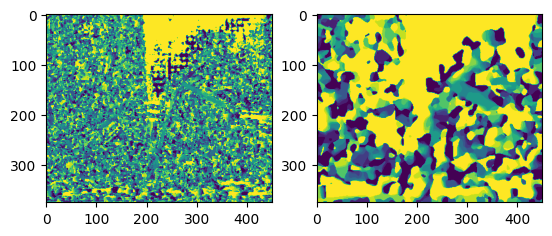

7


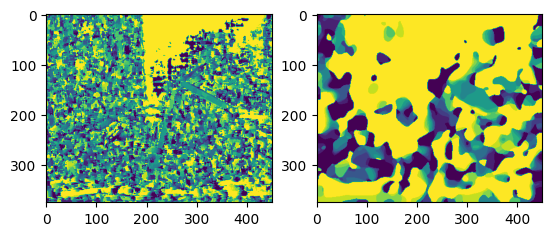

9


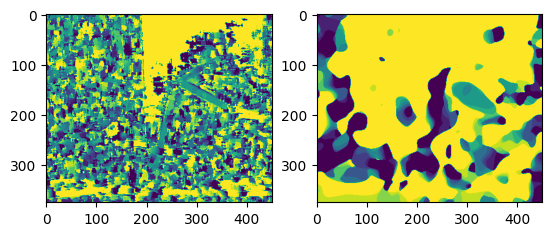

In [7]:
np.seterr(divide='ignore',invalid='ignore')
im_l = np.array(Image.open('../image/im1.png').convert('L'),'f')
im_r = np.array(Image.open('../image/im2.png').convert('L'),'f')
# 开始偏移，并设置步长
steps = 12
start = 4
# ncc 的宽度
for wid in range(3,10,2):
    print(wid)
    plt.subplot(121)
    res = plane_sweep_ncc(im_l, im_r, start, steps, wid)
    plt.imshow(res)
    plt.subplot(122)
    res1 = plane_sweep_gauss(im_l, im_r, start, steps, wid)
    plt.imshow(res1)
    plt.show()
